In [10]:
import os
import h5py
import numpy as np
from matplotlib import colors, pyplot as plt, ticker
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp, utils as ut
from pysar.simulation.plot import *
from pysar import view

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR')
os.chdir(work_dir)
print('Go to directory:', work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

mask_file = 'maskTempCoh.h5'
vel_files = ['velocity.h5',
             'velocity_lowpass_gaussian.h5',
             'velocity_highpass_gaussian.h5']
atr = readfile.read_attribute(vel_files[0])

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR


In [4]:
## run spatial_filter.py
for filt in ['lowpass_gaussian', 'highpass_gaussian']:
    cmd = 'spatial_filter.py  {} {} 3'.format(vel_files[0], filt)
    print(cmd)
    os.system(cmd)
print('Done.')

spatial_filter.py  velocity.h5 lowpass_gaussian 3
spatial_filter.py  velocity.h5 highpass_gaussian 3
Done.


DESCENDING orbit
flip figure left and right
DESCENDING orbit
flip figure left and right
DESCENDING orbit
flip figure left and right


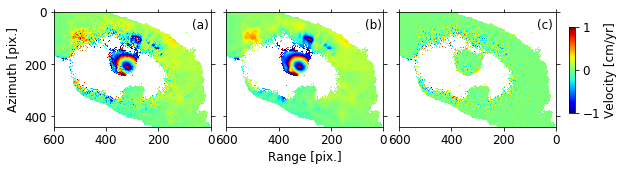

In [25]:
## plot
proj_name = 'AlcedoSenDT128'
box = (280, 720, 880, 1160)
wrap_range = [-1., 1.]

mask = readfile.read(mask_file, box=box)[0]

num_ids = ['(a)', '(b)', '(c)']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[9, 3], sharey=True)
for i in range(len(vel_files)):
    # read data
    data = readfile.read(vel_files[i], datasetName='velocity', box=box)[0] * 100.
    data = ut.wrap(data, wrap_range=wrap_range)
    data[mask == 0] = np.nan
    # plot
    ax = axs[i]
    im = ax.imshow(data, vmin=wrap_range[0], vmax=wrap_range[1], cmap='jet')

    pp.auto_flip_direction(atr, ax=ax)
    ax.tick_params(which='both', direction='out', top=True, bottom=True, left=True, right=True, labelsize=font_size)
    ax.annotate(num_ids[i], xy=(0.88, 0.85), color='k', xycoords='axes fraction', fontsize=font_size)

axs[0].set_ylabel('Azimuth [pix.]', fontsize=font_size)
axs[1].set_xlabel('Range [pix.]', fontsize=font_size)
fig.subplots_adjust(wspace=0.1)

# colorbar
cax = fig.add_axes([0.92, 0.3, 0.01, 0.4])
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=font_size)
cbar.locator = ticker.MaxNLocator(nbins=1)
cbar.update_ticks()
cbar.set_label('Velocity [cm/yr]', fontsize=font_size)

plt.savefig('{}_vel_filter.jpg'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()